<a href="https://colab.research.google.com/github/worldstar0722/IS_4482_25FA/blob/main/A4_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import datetime

# Load dataset
url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_modified.csv"
df = pd.read_csv(url)


In [11]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [12]:
df = df.select_dtypes(include=['object'])

y_target = df.pop('y')
y_target = y_target.eq('yes').mul(1)

df.info()
df.describe(include='all')
df.head()

X_encoded = pd.get_dummies(df, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_target, test_size=0.3, random_state=42, stratify=y_target)

print("Overall:", y_target.value_counts(normalize=True))
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB
Overall: y
0    0.890454
1    0.109546
Name: proportion, dtype: float64
Train: y
0    0.890316
1    0.109684
Name: proportion, dtype: float64
Test: y
0    0.890777
1    0.109223
Name: proportion, dtype: float64


# Task 2

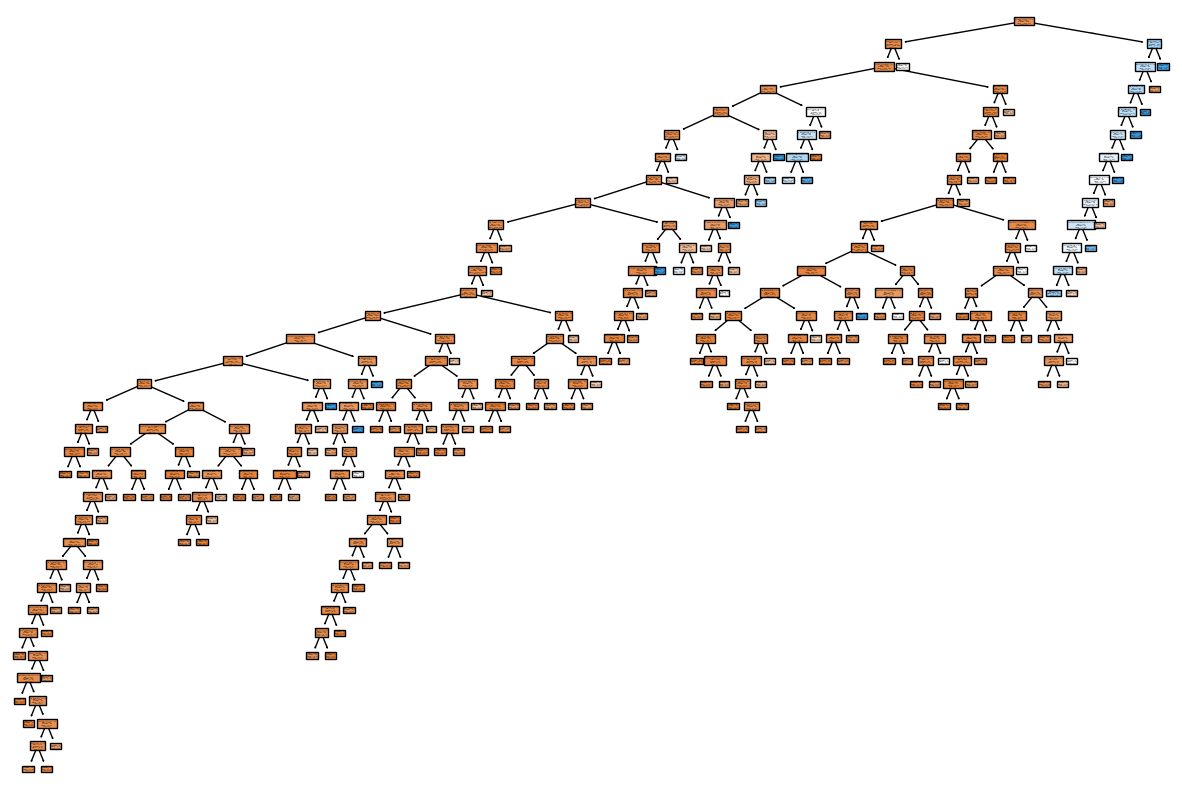

Training Results:
[[2528   37]
 [ 212  104]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2565
           1       0.74      0.33      0.46       316

    accuracy                           0.91      2881
   macro avg       0.83      0.66      0.70      2881
weighted avg       0.90      0.91      0.90      2881

Testing Results:
[[1071   30]
 [ 106   29]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1101
           1       0.49      0.21      0.30       135

    accuracy                           0.89      1236
   macro avg       0.70      0.59      0.62      1236
weighted avg       0.86      0.89      0.87      1236



In [13]:
dt_model = DecisionTreeClassifier(random_state=42, min_samples_split=30)
dt_model.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_encoded.columns, class_names=["No", "Yes"])
plt.show()

# Training performance
y_train_pred = dt_model.predict(X_train)
print("Training Results:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Testing performance
y_test_pred = dt_model.predict(X_test)
print("Testing Results:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Task 3

In [14]:
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Training performance
y_train_pred = nb_model.predict(X_train)
print("Training Results:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Testing performance
y_test_pred = nb_model.predict(X_test)
print("Testing Results:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Results:
[[2412  153]
 [ 194  122]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2565
           1       0.44      0.39      0.41       316

    accuracy                           0.88      2881
   macro avg       0.68      0.66      0.67      2881
weighted avg       0.87      0.88      0.88      2881

Testing Results:
[[1042   59]
 [  92   43]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1101
           1       0.42      0.32      0.36       135

    accuracy                           0.88      1236
   macro avg       0.67      0.63      0.65      1236
weighted avg       0.86      0.88      0.87      1236



# Task 4

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

dt_model_cv = DecisionTreeClassifier(random_state=42, min_samples_split=25)

cv_results_dt = cross_validate(
    dt_model_cv,
    X_encoded,
    y_target,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("Decision Tree CV Results")
for metric in scoring:
    print(f"{metric.capitalize()} - Train: {cv_results_dt['train_'+metric].mean():.3f}, "
          f"Test: {cv_results_dt['test_'+metric].mean():.3f}")


Decision Tree CV Results
Accuracy - Train: 0.914, Test: 0.884
Precision - Train: 0.742, Test: 0.434
Recall - Train: 0.336, Test: 0.191
F1 - Train: 0.462, Test: 0.263


In [16]:

nb_model_cv = CategoricalNB()

cv_results_nb = cross_validate(
    nb_model_cv,
    X_encoded,
    y_target,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("\nNaïve Bayes CV Results")
for metric in scoring:
    print(f"{metric.capitalize()} - Train: {cv_results_nb['train_'+metric].mean():.3f}, "
          f"Test: {cv_results_nb['test_'+metric].mean():.3f}")



Naïve Bayes CV Results
Accuracy - Train: 0.881, Test: 0.881
Precision - Train: 0.449, Test: 0.449
Recall - Train: 0.366, Test: 0.357
F1 - Train: 0.403, Test: 0.396
